In [1]:
import h2o 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.estimators.kmeans import H2OKMeansEstimator
from h2o.estimators.pca import H2OPrincipalComponentAnalysisEstimator

In [2]:
%matplotlib inline
%matplotlib notebook

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_211"; Java(TM) SE Runtime Environment (build 1.8.0_211-b12); Java HotSpot(TM) 64-Bit Server VM (build 25.211-b12, mixed mode)
  Starting server from /anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/l1/2mp6j77s607_d5wh_lyckl9c0000gn/T/tmptzp8qmav
  JVM stdout: /var/folders/l1/2mp6j77s607_d5wh_lyckl9c0000gn/T/tmptzp8qmav/h2o_fanliu_started_from_python.out
  JVM stderr: /var/folders/l1/2mp6j77s607_d5wh_lyckl9c0000gn/T/tmptzp8qmav/h2o_fanliu_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.2
H2O cluster version age:,16 days
H2O cluster name:,H2O_from_python_fanliu_b5lrpe
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [4]:
path = 'assign_05_train.csv'

In [5]:
col_types = {'repeater': 'enum',
             'id': 'enum',
             'chain': 'enum',
            'market': 'enum',
            'offerdate': 'enum'}

In [6]:
frame = h2o.import_file(path=path, col_types=col_types)
frame.describe()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:64122
Cols:18




,id,chain,offer,market,repeater,offerdate,category,quantity,company,offervalue,brand,avg_category_quantity,avg_category_amount,exact_item_bought,month,week,dayOfWeek,day
type,enum,enum,enum,enum,enum,enum,enum,int,enum,real,enum,real,real,int,int,int,enum,int
mins,,,,,,,,1.0,,0.75,,-1.0,-85.14,0.0,3.0,9.0,,1.0
mean,,,,,,,,1.0,,1.255356975764948,,0.6942286652420043,2.244028120538139,0.5060197748042793,3.587021615046318,14.372602227004773,,19.029849349677185
maxs,,,,,,,,1.0,,3.0,,44.181818182,60.802,1.0,4.0,18.0,,31.0
sigma,,,,,,,,0.0,,0.5238038613432843,,0.7714497289290285,2.631968000178954,0.49996765957894,0.49237284581128143,2.163732658694186,,9.628506814875895
zeros,,,,,,,,0,,0,,29124,29138,31675,0,0,,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,86246,205,1208251,34,1,1366761600000,2202,1.0,104460040,2.0,3718,0.0,0.0,0.0,4.0,17.0,Wed,24.0
1,12682470,18,unknown,11,0,1364428800000,unknown,1.0,unknown,0.75,unknown,1.0,2.5,1.0,3.0,13.0,Thu,28.0
2,13807224,4,1204576,1,0,1365120000000,5616,1.0,104610040,1.0,15889,1.4375,3.365,1.0,4.0,14.0,Fri,5.0


In [7]:
y = 'repeater'
X = [name for name in frame.columns if name != y]
print(y)
print(X)

repeater
['id', 'chain', 'offer', 'market', 'offerdate', 'category', 'quantity', 'company', 'offervalue', 'brand', 'avg_category_quantity', 'avg_category_amount', 'exact_item_bought', 'month', 'week', 'dayOfWeek', 'day']


In [8]:
reals, enums = [], []
for key, val in frame.types.items():
    if key in X:
        if val == 'enum':
            enums.append(key)
        elif key != 'quantity': 
            reals.append(key)

print(enums)
print(reals)

['id', 'chain', 'offer', 'market', 'offerdate', 'category', 'company', 'brand', 'dayOfWeek']
['offervalue', 'avg_category_quantity', 'avg_category_amount', 'exact_item_bought', 'month', 'week', 'day']


In [9]:
frame[reals].impute(method='mean')
frame[reals] = frame[reals].scale()

In [10]:
clusters = H2OKMeansEstimator(standardize=False, seed=12345)
clusters.train(x=X, training_frame=frame)

kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [11]:
labels = clusters.predict(frame)
labeled_frame = frame.cbind(labels)
labeled_frame[-1].head()

kmeans prediction progress: |█████████████████████████████████████████████| 100%


predict
0
0
0
0
0
0
0
0
0
0


In [12]:
from mpl_toolkits.mplot3d import Axes3D

def plot(_3d_labeled_frame):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(features_pandas[_3d_labeled_frame.label == 0].iloc[0:_3d_labeled_frame.shape[0],0], 
               features_pandas[_3d_labeled_frame.label == 0].iloc[0:_3d_labeled_frame.shape[0], 1],
               features_pandas[_3d_labeled_frame.label == 0].iloc[0:_3d_labeled_frame.shape[0], 2],
               color='m', marker='^')            
    ax.set_xlabel("PC 1")
    ax.set_ylabel("PC 2")
    ax.set_zlabel("PC 3")

pca Model Build progress: |███████████████████████████████████████████████| 100%


/anaconda3/lib/python3.7/site-packages/h2o/job.py:69: UserWarning: _train: Dataset used may contain fewer number of rows due to removal of rows with NA/missing values.  If this is not desirable, set impute_missing argument in pca call to TRUE/True/true/... depending on the client language.
  warnings.warn(w)


pca prediction progress: |████████████████████████████████████████████████| 100%
        PC1       PC2       PC3  label
0 -1.172644 -2.297699  0.085735      0
1  0.231580  1.529161  1.243358      0
2  1.750904  0.393891 -1.334724      0
3 -0.911363 -0.252014 -2.131199      0
4 -0.877336 -0.221604 -2.313506      0


<IPython.core.display.Javascript object>


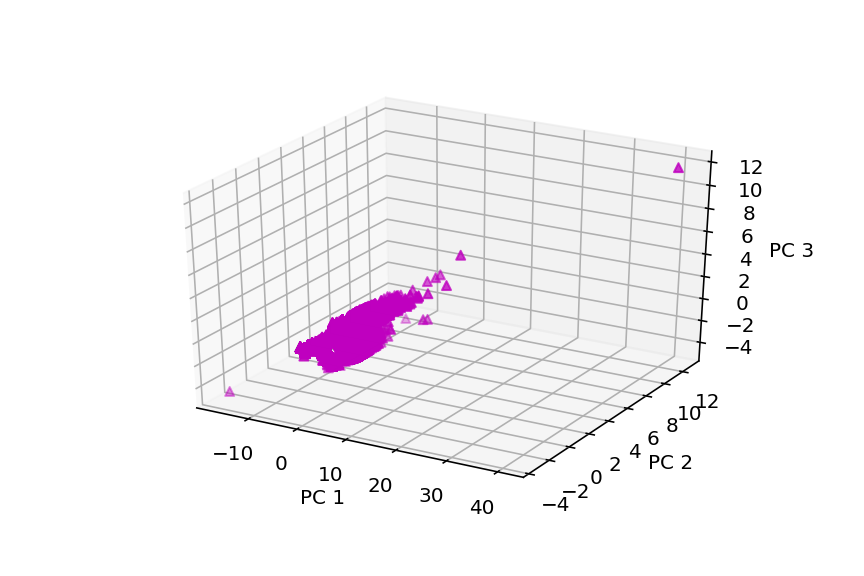

In [13]:
pca = H2OPrincipalComponentAnalysisEstimator(k=3)
pca.train(x=reals, training_frame=labeled_frame)
features = pca.predict(labeled_frame)
features_pandas = features.as_data_frame()
features_pandas['label'] = labeled_frame[-1].as_data_frame()
print(features_pandas.head(5))
plot(features_pandas)

In [14]:
features_pandas.index[features_pandas['PC1']>40].tolist()

[21276]

In [15]:
features_pandas.index[features_pandas['PC1']<-10].tolist()

[2903]

In [16]:
labeled_frame_new= labeled_frame.drop([2903,21276], axis = 0)

pca Model Build progress: |███████████████████████████████████████████████| 100%
pca prediction progress: |████████████████████████████████████████████████| 100%
        PC1       PC2       PC3  label
0 -1.156614 -2.309657  0.065194      0
1  0.218949  1.529343  1.258752      0
2  1.754912  0.414459 -1.322777      0
3 -0.896849 -0.249561 -2.131369      0
4 -0.862260 -0.218164 -2.313561      0


<IPython.core.display.Javascript object>


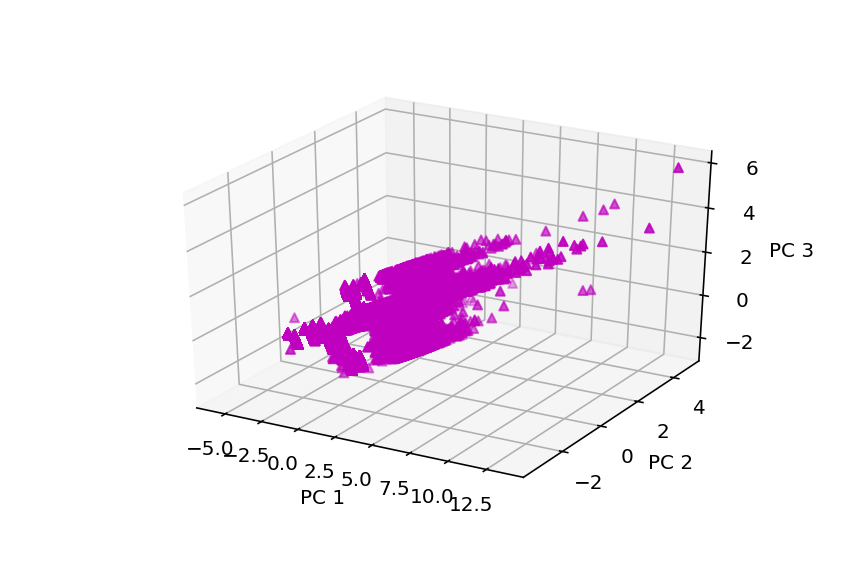

In [17]:
pca = H2OPrincipalComponentAnalysisEstimator(k=3)
pca.train(x=reals, training_frame=labeled_frame_new)
features = pca.predict(labeled_frame_new)
features_pandas = features.as_data_frame()
features_pandas['label'] = labeled_frame_new[-1].as_data_frame()
print(features_pandas.head(5))
plot(features_pandas)

In [18]:
List = list(range(1,11))
SSW = []
for i in range(1,11):
    clusters = H2OKMeansEstimator(standardize=False, k = i, seed=12345)
    clusters.train(x=X, training_frame=labeled_frame_new)
    SSW.append(clusters.tot_withinss())

kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%


<IPython.core.display.Javascript object>


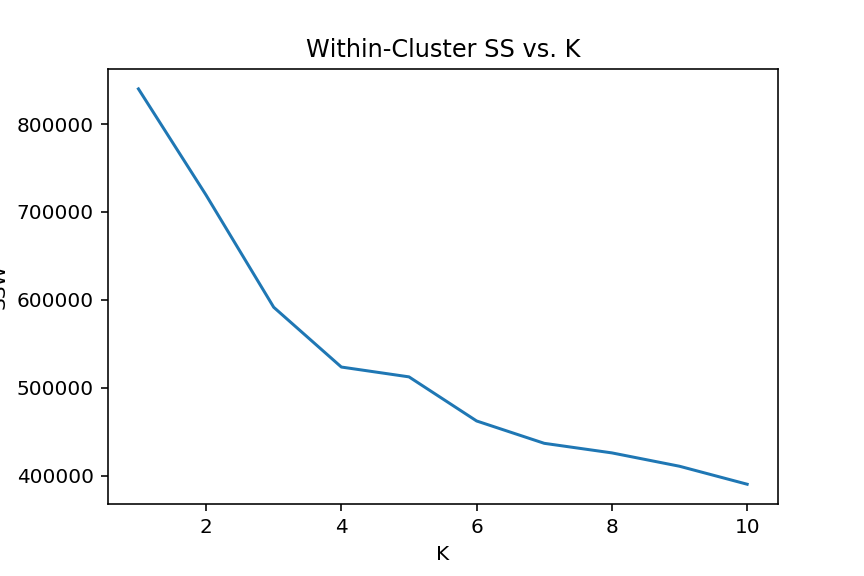

Text(0.5, 1.0, 'Within-Cluster SS vs. K')

In [19]:
plt.plot(List, SSW)
plt.xlabel("K")
plt.ylabel("SSW")
plt.title("Within-Cluster SS vs. K")
# We should use 4 Clusters

In [20]:
clusters_4 = H2OKMeansEstimator(standardize=False, k=4,seed=12345)
clusters_4.train(x=X, training_frame=labeled_frame_new)
print(clusters_4)

kmeans Model Build progress: |████████████████████████████████████████████| 100%
Model Details
H2OKMeansEstimator :  K-means
Model Key:  KMeans_model_python_1556911874632_14


ModelMetricsClustering: kmeans
** Reported on train data. **

MSE: NaN
RMSE: NaN
Total Within Cluster Sum of Square Error: 523553.7134760895
Total Sum of Square Error to Grand Mean: 840056.1062502387
Between Cluster Sum of Square Error: 316502.3927741492
Centroid Statistics: 


,centroid,size,within_cluster_sum_of_squares
,1.0,9994.0,65498.4011733
,2.0,10274.0,77614.8524446
,3.0,21704.0,175226.9833347
,4.0,22148.0,205213.4765235


Scoring History: 


,timestamp,duration,iterations,number_of_reassigned_observations,within_cluster_sum_of_squares
,2019-05-03 15:32:13,0.002 sec,0.0,nan,nan
,2019-05-03 15:32:14,0.259 sec,1.0,64120.0,940462.4252810
,2019-05-03 15:32:14,0.292 sec,2.0,12899.0,596943.9474349
,2019-05-03 15:32:14,0.324 sec,3.0,8677.0,559787.0184444
,2019-05-03 15:32:14,0.357 sec,4.0,2181.0,525328.1647773
,2019-05-03 15:32:14,0.388 sec,5.0,170.0,523556.5301761
,2019-05-03 15:32:14,0.419 sec,6.0,6.0,523553.7244614


In [21]:
labels_4 = clusters_4.predict(labeled_frame_new)
labeled_frame_4 = labeled_frame_new.cbind(labels_4)
labeled_frame_4[-1].head()

kmeans prediction progress: |█████████████████████████████████████████████| 100%


predict0
0
3
3
2
2
0
2
3
2
3


In [22]:
def plot_4(_3d_labeled_frame):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    _0 = ax.scatter(features_pandas[_3d_labeled_frame.label == 0].iloc[0:_3d_labeled_frame.shape[0],0], 
               features_pandas[_3d_labeled_frame.label == 0].iloc[0:_3d_labeled_frame.shape[0], 1],
               features_pandas[_3d_labeled_frame.label == 0].iloc[0:_3d_labeled_frame.shape[0], 2],
               color='m', marker='^', alpha = .15)  
    _1 = ax.scatter(features_pandas[_3d_labeled_frame.label == 1].iloc[0:_3d_labeled_frame.shape[0],0], 
               features_pandas[_3d_labeled_frame.label == 1].iloc[0:_3d_labeled_frame.shape[0], 1],
               features_pandas[_3d_labeled_frame.label == 1].iloc[0:_3d_labeled_frame.shape[0], 2],
               color='c', marker='+', alpha = .15) 
    _2 = ax.scatter(features_pandas[_3d_labeled_frame.label == 2].iloc[0:_3d_labeled_frame.shape[0],0], 
               features_pandas[_3d_labeled_frame.label == 2].iloc[0:_3d_labeled_frame.shape[0], 1],
               features_pandas[_3d_labeled_frame.label == 2].iloc[0:_3d_labeled_frame.shape[0], 2],
               color='g', marker='.', alpha = .15) 
    _3 = ax.scatter(features_pandas[_3d_labeled_frame.label == 3].iloc[0:_3d_labeled_frame.shape[0],0], 
               features_pandas[_3d_labeled_frame.label == 3].iloc[0:_3d_labeled_frame.shape[0], 1],
               features_pandas[_3d_labeled_frame.label == 3].iloc[0:_3d_labeled_frame.shape[0], 2],
               color='b', marker='3', alpha = .15)  
    
    ax.set_xlabel("PC 1")
    ax.set_ylabel("PC 2")
    ax.set_zlabel("PC 3")
    ax.legend([_0, _1, _2,_3], 
               ['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3'],
               bbox_to_anchor=(1.05, 0.5), 
               loc=1, borderaxespad=0.)


pca Model Build progress: |███████████████████████████████████████████████| 100%
pca prediction progress: |████████████████████████████████████████████████| 100%


<IPython.core.display.Javascript object>


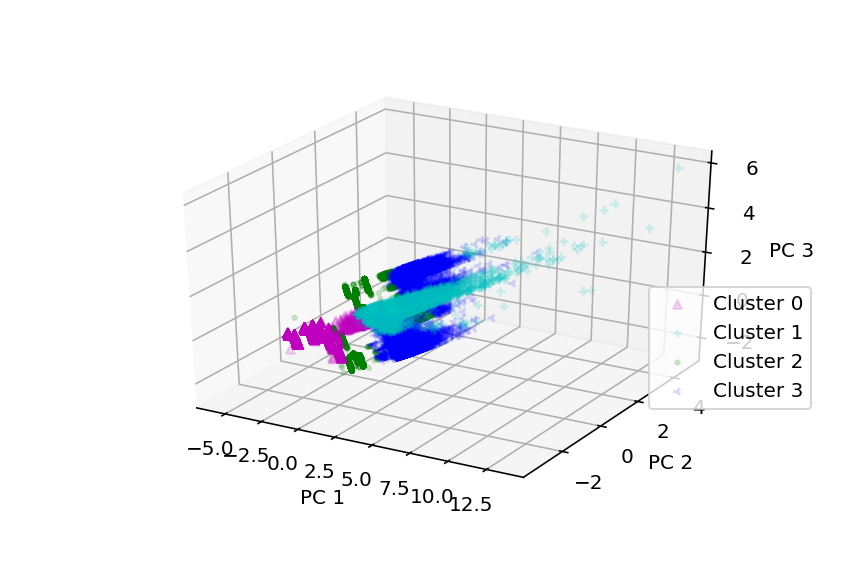

In [23]:
pca = H2OPrincipalComponentAnalysisEstimator(k=3)
pca.train(x=reals, training_frame=labeled_frame_4)
features = pca.predict(labeled_frame_4)
features_pandas = features.as_data_frame()
features_pandas['label'] = labeled_frame_4[-1].as_data_frame()
plot_4(features_pandas)

In [24]:
# profile clusters by means
grouped = labeled_frame_4.group_by(by=['predict0'])
means = grouped.mean(col=reals).get_frame()
print(means)

predict0,mean_offervalue,mean_avg_category_quantity,mean_avg_category_amount,mean_exact_item_bought,mean_month,mean_week,mean_day
0,1.39768,-0.86023,-0.813521,-0.951465,0.838751,1.22913,0.632364
1,-0.26991,1.10391,1.13047,0.988024,0.832426,1.2142,0.56527
2,-0.398708,-0.757695,-0.768494,-1.01109,-0.737917,-0.742371,0.00794896
3,-0.114699,0.615969,0.596414,0.961745,-0.0414811,-0.390411,-0.555395


In [25]:
h2o.cluster().shutdown()

H2O session _sid_b262 closed.
